In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the Libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 20s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
163/163 [==============================] - 683s 4s/step - loss: 1.6955 - accuracy: 0.6990 - val_loss: 0.3859 - val_accuracy: 0.8301
Epoch 2/20
163/163 [==============================] - 537s 3s/step - loss: 0.3806 - accuracy: 0.8387 - val_loss: 0.3434 - val_accuracy: 0.8558
Epoch 3/20
163/163 [==============================] - 554s 3s/step - loss: 0.3030 - accuracy: 0.8767 - val_loss: 0.6738 - val_accuracy: 0.7131
Epoch 4/20
163/163 [==============================] - 619s 4s/step - loss: 0.2483 - accuracy: 0.8980 - val_loss: 0.6893 - val_accuracy: 0.7340
Epoch 5/20
163/163 [==============================] - 577s 4s/step - loss: 0.2893 - accuracy: 0.8850 - val_loss: 0.4949 - val_accuracy: 0.8173
Epoch 6/20
163/163 [==============================] - 571s 4s/step - loss: 0.3596 - accuracy: 0.8777 - val_loss: 0.3028 - val_accuracy: 0.8734
Epoch 7/20
163/163 [==============================] - 737s 5s/step - loss: 0.3127 - accuracy: 0.8829 - val_loss: 0.3047 - val_accuracy: 0.8766

In [15]:
import matplotlib.pyplot as plt

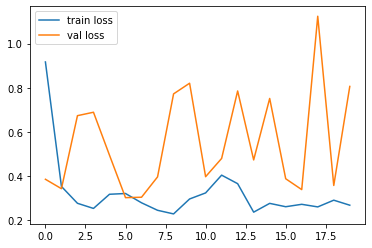

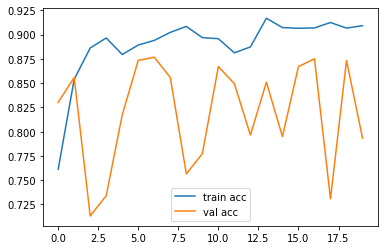

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('pneumonia_resnet50.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('pneumonia_resnet50.h5')

In [67]:
path='Datasets/val/PNEUMONIA/person1946_bacteria_4874.jpeg'
img=image.load_img(path,target_size=(224,224))

In [68]:
x=image.img_to_array(img)

In [69]:
x=np.expand_dims(x, axis=0)

In [70]:
img_data=preprocess_input(x)

In [71]:
classes=model.predict(img_data)

In [72]:
result=int(classes[0][0])

In [73]:
print(result)

0


In [74]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA
